## I. PROBLEM STATEMENT

Cardiovascular disease and heart disease all refer to various heart conditions. Examples of diseases under the heart disease umbrella include conditions like coronary artery disease. Every year, about 17.9 million people die from heart disease. Apart from this, there are many factors that raise one's risk of heart disease. Here we create a suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.

List of Machine Learning Algorithm and find out which algorithm predicts accurately.

1.Logistic Regression

2.Naive Bayes

3.Random Forest Classifier

4.K-Nearest Neighbour

5.Decision Tree

6.Support Vector Machine


## II. DATASET DESCRIPTION

Public Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithms and findout which algorithm suitable for this dataset.


## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

In [1]:
#loading dataset
import pandas as pd
import numpy as nps

data = pd.read_csv('heart.csv')


### 2. Overview of the dataset:

### Attribute Information:
Age (age in years)

Sex (1 = male; 0 = female)

CP (chest pain type)

TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))

CHOL (serum cholestoral in mg/dl)

FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

RESTECH (resting electrocardiographic results)

THALACH (maximum heart rate achieved)

EXANG (exercise induced angina (1 = yes; 0 = no))

OLDPEAK (ST depression induced by exercise relative to rest)

SLOPE (the slope of the peak exercise ST segment)

CA (number of major vessels (0-3) colored by flourosopy)

THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)

TARGET (1 or 0)


### 3. Print the first five and last five rows of the dataset

In [2]:
#First five rows of the dataset
data.head(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Last five rows of the dataset
data.tail(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 4. Find the summary statistics of the dataset

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('heart.csv')


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [6]:
#All data has value
data.isnull().any()



age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### 6. Plot the nullity matrix and nullity correlation heatmap.

<AxesSubplot:>

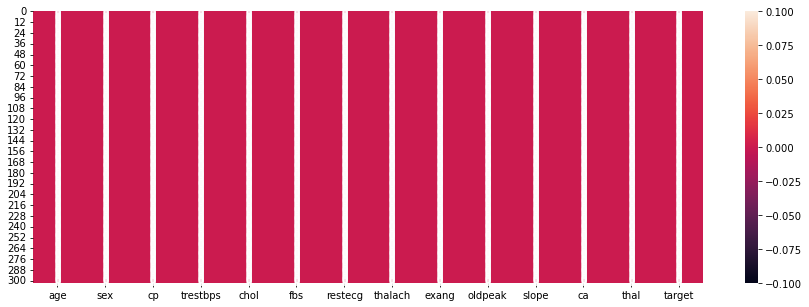

In [7]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.isnull(), annot=True)

### 7. Delete the columns having more than 80% of values missing.

In [8]:
#There's nothing to impute since all data has value
data.isnull().any()


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [13]:
# There's nothing to impute since all data has value

### 9. Use OneHotEncoder. Process the dataset to convert all features to numerical values. First, find the number of columns that will stay in their original form (that is, numerical features) and that need to be one-hot encoded (that is, the categorical features). Use OneHotEncoder.

In [14]:
# All data are already in numerical values

### 10. Export the Cleaned Dataset.

In [9]:
data.to_csv('CleanedData.csv')



## IV.  AI MODELLING - APPLIED CLASSIFICATION ANALYSIS (ACA) using ENSEMBLE

### 1. Import the required dependencies.

In [10]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

### 2. Read the cleaned data.

In [11]:
data = pd.read_csv('CleanedData.csv')
data.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. Divide the dataset into train and validation DataFrames.



In [15]:

train, val = train, val = train_test_split(data, test_size=0.20) 

X_train = train.drop(columns=['target'])
y_train = train['target'].values

x_val = val.drop(columns=['target'])
y_val = val['target'].values



In [17]:
x_val.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
260,260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
267,267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
7,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
35,35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
186,186,60,1,0,130,253,0,1,144,1,1.4,2,1,3


In [18]:
X_train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
56,56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
236,236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
243,243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
157,157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
266,266,55,0,0,180,327,0,2,117,1,3.4,1,0,2


### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model as classifier. 

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

In [19]:
##Model Preparation 
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [25]:
#Logistic Regression
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

lr.fit(X_train, y_train)
lr_preds_train = lr.predict(X_train)
lr_preds_val = lr.predict(x_val)

print('Logistic Regression:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=lr_preds_train),
    accuracy_score(y_true=y_val, y_pred=lr_preds_val)
))

confussion matrix
[[27  0]
 [ 0 34]]


Accuracy of Logistic Regression: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Logistic Regression:
> Accuracy on training data = 0.9917
> Accuracy on validation data = 0.4590


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
#Naive Bayes
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

nb.fit(X_train, y_train)
nb_preds_train = nb.predict(X_train)
nb_preds_val = nb.predict(x_val)

print('Naive Bayes:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=nb_preds_train),
    accuracy_score(y_true=y_val, y_pred=nb_preds_val)
))

confussion matrix
[[27  0]
 [ 0 34]]


Accuracy of Naive Bayes model: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Naive Bayes:
> Accuracy on training data = 0.9380
> Accuracy on validation data = 0.4918


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [28]:
#Random Forest Classifier
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

rf.fit(X_train, y_train)
rf_preds_train = rf.predict(X_train)
rf_preds_val = rf.predict(x_val)

print('Random Forest:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=rf_preds_train),
    accuracy_score(y_true=y_val, y_pred=rf_preds_val)
))

confussion matrix
[[27  0]
 [ 0 34]]


Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Random Forest:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.4754


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [29]:
#KNN Classifier
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

knn.fit(X_train, y_train)
knn_preds_train = knn.predict(X_train)
knn_preds_val = knn.predict(x_val)

print('K Nearest Neighbor:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=knn_preds_train),
    accuracy_score(y_true=y_val, y_pred=knn_preds_val)
))

confussion matrix
[[25  2]
 [ 3 31]]


Accuracy of K-NeighborsClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

K Nearest Neighbor:
> Accuracy on training data = 0.9339
> Accuracy on validation data = 0.6557


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [34]:
# Decision Tree

m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

dt.fit(X_train, y_train)
dt_preds_train = dt.predict(X_train)
dt_preds_val = dt.predict(x_val)

print('Decision Tree:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=dt_preds_train),
    accuracy_score(y_true=y_val, y_pred=dt_preds_val)
))


confussion matrix
[[27  0]
 [ 0 34]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Decision Tree:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.4754


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [35]:
#Support Vector Classifier
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

svc.fit(X_train, y_train)
svc_preds_train = svc.predict(X_train)
svc_preds_val = svc.predict(x_val)

print('Support Vector:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=svc_preds_train),
    accuracy_score(y_true=y_val, y_pred=svc_preds_val)
))

confussion matrix
[[27  0]
 [ 0 34]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Support Vector:
> Accuracy on training data = 0.9959
> Accuracy on validation data = 0.4590


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


### 5. Calculate the accuracy, precision, and recall for predictions on the validation set, and print the confusion matrix (Target F1-Score >= 80%):

In [36]:
scv=StackingCVClassifier(classifiers=[knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[27  0]
 [ 3 31]]


Accuracy of StackingCVClassifier: 95.08196721311475 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.91      0.95        34

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



### 6. Plot the precision-recall curve or the AUC-ROC Curve:

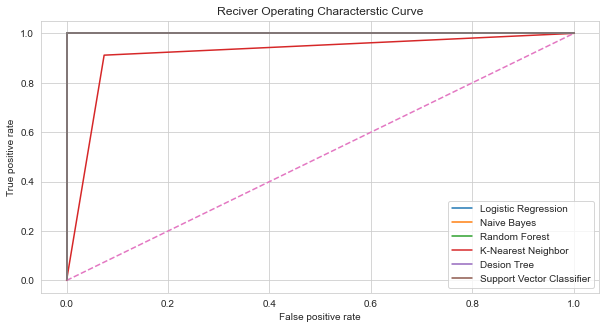

In [37]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### 7. Predict the final values on the test dataset.

In [40]:
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, precision_recall_curve)

X_train_with_metapreds = np.zeros((X_train.shape[0], X_train.shape[1]+2))
X_train_with_metapreds[:, :-2] = X_train
X_train_with_metapreds[:, -2:] = -1
#print(X_train_with_metapreds)
x_val_with_metapreds = np.zeros((x_val.shape[0], x_val.shape[1]+2))
x_val_with_metapreds[:, :-2] = x_val
x_val_with_metapreds[:, -2:] = -1
#print(x_val_with_metapreds)

In [41]:
svc = SVC(random_state=11, max_iter=1000)
svc.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

svc_pred = svc.predict(x_val)
knn_pred = knn.predict(x_val)

x_val_with_metapreds[:, -2] = svc_pred
x_val_with_metapreds[:, -1] = knn_pred

C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [42]:
# Comparing accuracy with that of base predictors

print('SVC:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=svc.predict(X_train)),
    accuracy_score(y_true=y_val, y_pred=svc_pred)
))
print('KNN:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=knn.predict(X_train)),
    accuracy_score(y_true=y_val, y_pred=knn_pred)
))

SVC:
> Accuracy on training data = 0.9835
> Accuracy on validation data = 0.4590
KNN:
> Accuracy on training data = 0.9339
> Accuracy on validation data = 0.4754


### 8. Export the Final Model using PICKLE Library.

In [43]:
import pickle

pkl_filename = "HeartModel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)


Test score: 100.00 %
